# RandomForest but with Rule (AQ algorithm)

Sample datasets are in the `example_data` folder

## Dataset: `tic-tac-toe-uma.csv`

### Loading the needed libraries

In [ ]:
import sys
!{sys.executable} -m pip install -r requirements.txt

In [1]:
import numpy as np
from core.forest import Forest
from sklearn.model_selection import KFold
from sklearn import metrics
import matplotlib.pyplot as plt
from tqdm import tqdm

### Training and testing

In [ ]:
all_stats = []

mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []

data = np.genfromtxt(fname="example_data/tic-tac-toe-uma.csv", delimiter=";", dtype=str)
X, y = data[:,:9], data[:,9:]

for _ in range(5):
    cv = KFold(n_splits=10, shuffle=True)
    for train_ix, test_ix in cv.split(X):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        forest = Forest(n_tree=100, train_x=X_train, train_y=y_train)
        score = []
        results = []
        print("Testing...")
        for test_x in tqdm(X_test):
            result, prec = forest.predict(test_x)
            results.append(result.tolist())
            score.append(prec)

        test_y = y_test

        fpr, tpr, _ = metrics.roc_curve(test_y, score, pos_label=['positive'])

        stats = {}
        stats["acc"] = metrics.accuracy_score(test_y, results)
        stats["precision"] = metrics.precision_score(test_y, results, labels=['positive'], average='micro')
        stats["recall"] = metrics.recall_score(test_y, results, labels=['positive'], average='micro')
        stats["f1_score"] = metrics.f1_score(test_y, results, labels=['positive'], average='micro')
        stats["auc"] = metrics.auc(fpr, tpr)
        stats["fpr"] = fpr
        stats["tpr"] = tpr
        stats["cm"] = metrics.confusion_matrix(test_y,results)


        interp_tpr = np.interp(mean_fpr, stats["fpr"], stats["tpr"])
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(stats["auc"])

        all_stats.append(stats)

In [4]:
def stats(dict_list, key):
    list = [el[key] for el in dict_list]
    np_list = np.array(list)
    return np.mean(np_list), np.std(np_list)

def get_min_and_max(dict_list, key):
    list = [el[key] for el in dict_list]
    return list.index(min(list)), list.index(max(list))


### Result

In [5]:
#mean and std for acc
stats(all_stats, "acc")

(0.9893464912280702, 0.009454205527409968)

In [6]:
#mean and std for precision
stats(all_stats, "precision")

(0.9852325887569106, 0.013865957883739573)

In [7]:
#mean and std for precision
stats(all_stats, "recall")

(0.9983267382702091, 0.00832799501748343)

In [8]:
#mean and std for f1_score
stats(all_stats, "f1_score")

(0.9916569871663053, 0.007427043871795441)

In [9]:
#worst and best index by acc and auc
min_v_acc, max_v_acc = get_min_and_max(all_stats, "acc")
min_v_auc, max_v_auc = get_min_and_max(all_stats, "auc")

### Worst and best acc

In [10]:
all_stats[min_v_acc]

{'acc': 0.968421052631579,
 'precision': 0.9558823529411765,
 'recall': 1.0,
 'f1_score': 0.9774436090225563,
 'auc': 0.6830769230769231,
 'fpr': array([0.        , 0.        , 0.        , 0.06666667, 0.1       ,
        0.1       , 0.13333333, 0.16666667, 0.33333333, 0.36666667,
        0.4       , 0.46666667, 0.53333333, 0.56666667, 0.6       ,
        0.66666667, 0.7       , 0.7       , 0.7       , 0.73333333,
        0.73333333, 0.73333333, 0.73333333, 0.83333333, 0.83333333,
        0.86666667, 0.93333333, 1.        , 1.        ]),
 'tpr': array([0.        , 0.16923077, 0.24615385, 0.38461538, 0.43076923,
        0.49230769, 0.52307692, 0.53846154, 0.56923077, 0.61538462,
        0.63076923, 0.66153846, 0.66153846, 0.66153846, 0.69230769,
        0.72307692, 0.73846154, 0.78461538, 0.8       , 0.84615385,
        0.86153846, 0.89230769, 0.92307692, 0.92307692, 0.93846154,
        0.93846154, 0.95384615, 0.95384615, 1.        ]),
 'cm': array([[27,  3],
        [ 0, 65]], dtype=int

In [11]:
all_stats[max_v_acc]

{'acc': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1_score': 1.0,
 'auc': 0.7274667931688804,
 'fpr': array([0.        , 0.02941176, 0.02941176, 0.02941176, 0.02941176,
        0.14705882, 0.20588235, 0.23529412, 0.29411765, 0.52941176,
        0.58823529, 0.58823529, 0.58823529, 0.58823529, 0.58823529,
        0.64705882, 0.64705882, 0.67647059, 0.73529412, 0.73529412,
        0.85294118, 0.88235294, 0.88235294, 0.88235294, 0.91176471,
        0.91176471, 0.97058824, 0.97058824, 1.        ]),
 'tpr': array([0.        , 0.11290323, 0.27419355, 0.46774194, 0.51612903,
        0.5483871 , 0.62903226, 0.67741935, 0.67741935, 0.67741935,
        0.69354839, 0.70967742, 0.74193548, 0.75806452, 0.80645161,
        0.80645161, 0.82258065, 0.87096774, 0.87096774, 0.88709677,
        0.88709677, 0.88709677, 0.9516129 , 0.96774194, 0.96774194,
        0.98387097, 0.98387097, 1.        , 1.        ]),
 'cm': array([[34,  0],
        [ 0, 62]], dtype=int64)}

### Worst and best auc

In [12]:
all_stats[min_v_auc]

{'acc': 0.9791666666666666,
 'precision': 0.967741935483871,
 'recall': 1.0,
 'f1_score': 0.9836065573770492,
 'auc': 0.6148148148148148,
 'fpr': array([0.        , 0.        , 0.        , 0.02777778, 0.02777778,
        0.08333333, 0.16666667, 0.19444444, 0.25      , 0.36111111,
        0.38888889, 0.5       , 0.52777778, 0.61111111, 0.66666667,
        0.69444444, 0.69444444, 0.80555556, 0.83333333, 0.86111111,
        0.86111111, 0.86111111, 0.86111111, 0.86111111, 0.86111111,
        0.86111111, 0.86111111, 0.91666667, 1.        ]),
 'tpr': array([0.        , 0.18333333, 0.23333333, 0.31666667, 0.4       ,
        0.43333333, 0.48333333, 0.51666667, 0.53333333, 0.56666667,
        0.56666667, 0.56666667, 0.56666667, 0.58333333, 0.6       ,
        0.6       , 0.66666667, 0.66666667, 0.68333333, 0.68333333,
        0.7       , 0.73333333, 0.78333333, 0.8       , 0.88333333,
        0.91666667, 0.96666667, 1.        , 1.        ]),
 'cm': array([[34,  2],
        [ 0, 60]], dtype=int

In [13]:
all_stats[max_v_auc]

{'acc': 0.9789473684210527,
 'precision': 0.967741935483871,
 'recall': 1.0,
 'f1_score': 0.9836065573770492,
 'auc': 0.8459523809523809,
 'fpr': array([0.        , 0.        , 0.        , 0.05714286, 0.05714286,
        0.05714286, 0.08571429, 0.11428571, 0.17142857, 0.22857143,
        0.28571429, 0.31428571, 0.34285714, 0.37142857, 0.42857143,
        0.45714286, 0.45714286, 0.48571429, 0.51428571, 0.57142857,
        0.62857143, 0.65714286, 0.71428571, 0.74285714, 0.8       ,
        0.82857143, 0.85714286, 0.88571429, 1.        ]),
 'tpr': array([0.        , 0.18333333, 0.3       , 0.41666667, 0.51666667,
        0.65      , 0.66666667, 0.71666667, 0.76666667, 0.78333333,
        0.78333333, 0.78333333, 0.8       , 0.8       , 0.8       ,
        0.81666667, 0.86666667, 0.86666667, 0.9       , 0.93333333,
        0.95      , 0.95      , 0.95      , 0.96666667, 0.96666667,
        0.98333333, 0.98333333, 1.        , 1.        ]),
 'cm': array([[33,  2],
        [ 0, 60]], dtype=int

### ROC curve for worst and best result

### ACC

<Figure size 432x288 with 0 Axes>

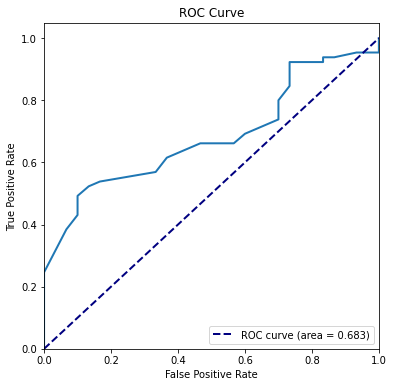

In [21]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[min_v_acc]["fpr"], all_stats[min_v_acc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[min_v_acc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

<Figure size 432x288 with 0 Axes>

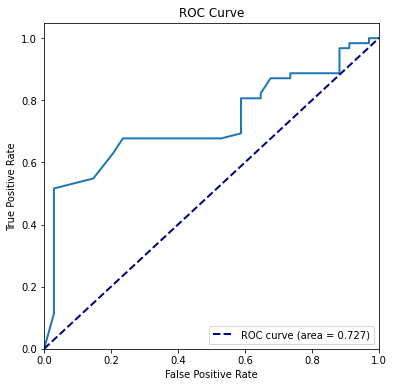

In [22]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[max_v_acc]["fpr"], all_stats[max_v_acc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[max_v_acc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

### AUC

<Figure size 432x288 with 0 Axes>

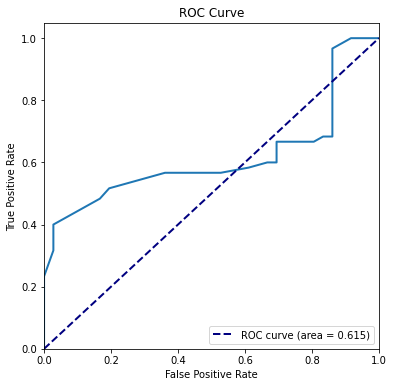

In [23]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[min_v_auc]["fpr"], all_stats[min_v_auc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[min_v_auc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

<Figure size 432x288 with 0 Axes>

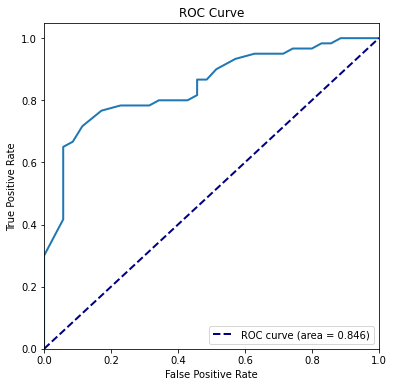

In [17]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[max_v_auc]["fpr"], all_stats[max_v_auc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[max_v_auc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

### Mean

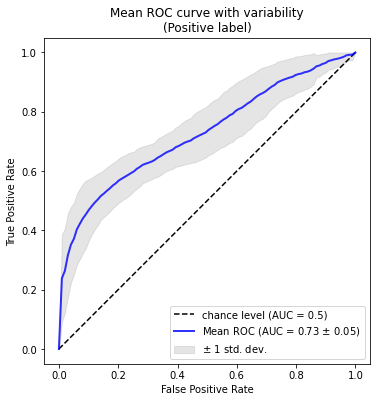

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label)",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

### Confusion Matrix for worst and best

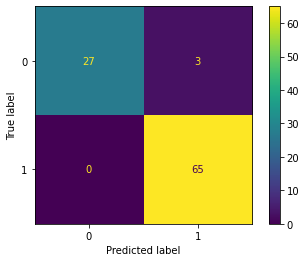

In [25]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[min_v_acc]["cm"])
pcm.plot()
plt.show()

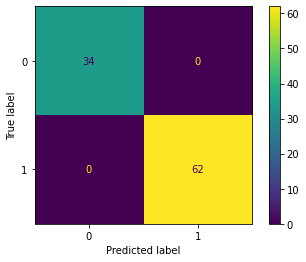

In [26]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[max_v_acc]["cm"])
pcm.plot()
plt.show()

### Compare with classic RandomForest

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

ohe = OneHotEncoder()
all_stats = []

X = ohe.fit_transform(data[:,:9])
y = np.array([1 if x == "positive" else 0 for x in data[:,9:]])

for _ in range(5):
    cv = KFold(n_splits=10, shuffle=True)
    for train_ix, test_ix in cv.split(X):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        rf=RandomForestClassifier(n_estimators=100)
        rf.fit(X_train,y_train)


        results=rf.predict(X_test)

        test_y = y_test


        stats = {}
        stats["acc"] = metrics.accuracy_score(test_y, results)
        stats["precision"] = metrics.precision_score(test_y, results, average='micro')
        stats["recall"] = metrics.recall_score(test_y, results, average='micro')
        stats["f1_score"] = metrics.f1_score(test_y, results, average='micro')
        stats["cm"] = metrics.confusion_matrix(test_y,results)

        all_stats.append(stats)

In [28]:
def stats(dict_list, key):
    list = [el[key] for el in dict_list]
    np_list = np.array(list)
    return np.mean(np_list), np.std(np_list)

def get_min_and_max(dict_list, key):
    list = [el[key] for el in dict_list]
    return list.index(min(list)), list.index(max(list))

In [29]:
stats(all_stats, "acc")

(0.9883114035087718, 0.010763255300607299)

In [30]:
stats(all_stats, "precision")

(0.9883114035087718, 0.010763255300607299)

In [31]:
stats(all_stats, "recall")

(0.9883114035087718, 0.010763255300607299)

In [32]:
stats(all_stats, "f1_score")

(0.9883114035087718, 0.010763255300607299)

In [33]:
min_v_acc, max_v_acc = get_min_and_max(all_stats, "acc")

In [34]:
all_stats[min_v_acc]

{'acc': 0.9583333333333334,
 'precision': 0.9583333333333334,
 'recall': 0.9583333333333334,
 'f1_score': 0.9583333333333334,
 'cm': array([[34,  4],
        [ 0, 58]], dtype=int64)}

In [35]:
all_stats[max_v_acc]

{'acc': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1_score': 1.0,
 'cm': array([[31,  0],
        [ 0, 65]], dtype=int64)}

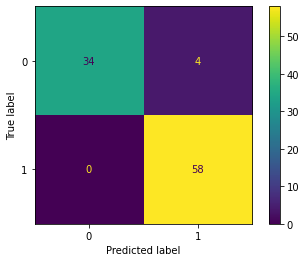

In [36]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[min_v_acc]["cm"])
pcm.plot()
plt.show()

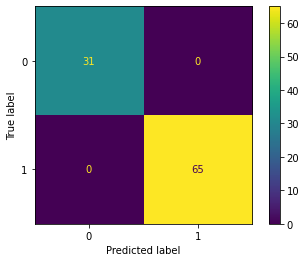

In [37]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[max_v_acc]["cm"])
pcm.plot()
plt.show()